<h1> Deep Learning Small Project </h1>

In [1]:
%matplotlib inline

# Display
from IPython.display import Image

# Torch
import torch
from torch.utils.data import DataLoader
from torch import optim, nn

# Custom
import data
import model
import utils

Using Custom Dataloader, Data Split for First Layer classification task (normal vs infected)

In [2]:
fl_labels = {
0 : "Normal",
1 : "Infected"
}

fl_train = data.Lung_Dataset('train', verbose = 0)
fl_test = data.Lung_Dataset('val', verbose = 0)
fl_val = data.Lung_Dataset('test', verbose = 0)

"""
Data Split for Second Layer classification task (COVID vs Non-COVID) 
"""

sl_labels = {
0 : "COVID",
1 : "Non-COVID"
}

sl_train = data.Lung_Dataset('train', verbose = 2)
sl_test = data.Lung_Dataset('val', verbose = 2)
sl_val = data.Lung_Dataset('test', verbose = 2)

"""
Data Split for combined classification task (normal vs COVID vs Non-COVID) 
"""

combined_labels = {
0 : "Normal",
1 : "COVID",
2 : "Non-COVID"
}

final_val = data.Lung_Dataset('test', verbose = 1)
final_test = data.Lung_Dataset('val', verbose = 1)

Defining Model Parameters

In [3]:
N_EPOCH = 200
L_RATE_FL = 0.001
BATCH_SIZE_FL = 32
DROPOUT_FL = 0.05
WD_FL = 0.01
L_RATE_SL = 0.01
BATCH_SIZE_SL = 64
DROPOUT_SL = 0.15
WD_SL = 0.01
PATIENCE = 10
STEPS = 10

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Training the First Layer Model

Training the first model to classify normal and infected images


Epoch 1


  0%|          | 0/163 [00:00<?, ?it/s]

Validation loss: 0.5306511223316193
Validation set accuracy:  76.26016260162602 %


Epoch 2


  0%|          | 0/163 [00:00<?, ?it/s]

Validation loss: 0.69262605458498
Validation set accuracy:  72.03252032520325 %


Epoch 3


  0%|          | 0/163 [00:00<?, ?it/s]

Validation loss: 1.3429153203964233
Validation set accuracy:  66.5040650406504 %


Epoch 4


  0%|          | 0/163 [00:00<?, ?it/s]

Validation loss: 0.7727077573537826
Validation set accuracy:  74.79674796747967 %


Epoch 5


  0%|          | 0/163 [00:00<?, ?it/s]

Validation loss: 1.051837758719921
Validation set accuracy:  70.5691056910569 %


Epoch 6


  0%|          | 0/163 [00:00<?, ?it/s]

Validation loss: 0.830896720290184
Validation set accuracy:  72.52032520325203 %


Epoch 7


  0%|          | 0/163 [00:00<?, ?it/s]

Validation loss: 0.8926949590444565
Validation set accuracy:  74.95934959349593 %


Epoch 8


  0%|          | 0/163 [00:00<?, ?it/s]

Validation loss: 0.6397968901321291
Validation set accuracy:  79.83739837398375 %


Epoch 9


  0%|          | 0/163 [00:00<?, ?it/s]

Validation loss: 0.9922987788915634
Validation set accuracy:  75.77235772357723 %


Epoch 10


  0%|          | 0/163 [00:00<?, ?it/s]

Validation loss: 1.2607937693595885
Validation set accuracy:  74.3089430894309 %


Epoch 11


  0%|          | 0/163 [00:00<?, ?it/s]

Validation loss: 1.5040242493152618
Validation set accuracy:  71.70731707317073 %



Test Accuracy of the first model:
Test set accuracy:  68.0 %


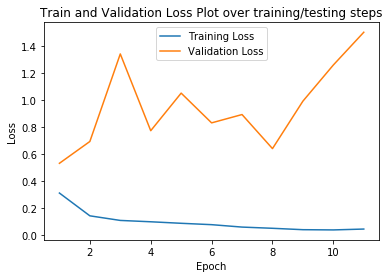

In [4]:
#First Model Training
fl_train_loader = DataLoader(fl_train, batch_size=BATCH_SIZE_FL, shuffle=True)
fl_val_loader = DataLoader(fl_val, batch_size=BATCH_SIZE_FL, shuffle=True)
fl_test_loader = DataLoader(fl_test, batch_size=BATCH_SIZE_FL, shuffle=True)
    
fl_model = model.CNN(dropout=DROPOUT_FL).to(device)
fl_optimizer = optim.AdamW(fl_model.parameters(), lr=L_RATE_FL, weight_decay=WD_FL)
fl_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(fl_optimizer, STEPS)
    
print("Training the first model to classify normal and infected images")
model.train(fl_model, device, nn.BCELoss(), fl_optimizer, fl_train_loader, fl_val_loader, N_EPOCH, PATIENCE, "fl", fl_scheduler, STEPS)

print("\n\n")
print("Test Accuracy of the first model:")
model.test(fl_model, device, fl_test_loader)

fl_model.to("cpu")
    
model.save_model(fl_model, fl_optimizer, './saved_models/fl_model.pth')

Training the Second Layer Model

In [ ]:
#Second Model Training
sl_train_loader = DataLoader(sl_train, batch_size=BATCH_SIZE_SL, shuffle=True)
sl_val_loader = DataLoader(sl_val, batch_size=BATCH_SIZE_SL, shuffle=True)
sl_test_loader = DataLoader(sl_test, batch_size=BATCH_SIZE_SL, shuffle=True)
    
sl_model = model.CNN(dropout=DROPOUT_SL).to(device)  
sl_optimizer = optim.AdamW(sl_model.parameters(), lr=L_RATE_SL, weight_decay=WD_SL)
sl_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(sl_optimizer, STEPS)

print("\n\n")
print("Training the second model to classify COVID and non-COVID images")
model.train(sl_model, device, nn.BCELoss(), sl_optimizer, sl_train_loader, sl_val_loader, N_EPOCH, PATIENCE, "sl", sl_scheduler,STEPS)
    
print("\n\n")
print("Test Accuracy of the second model:")
model.test(sl_model, device, sl_test_loader)
    
sl_model.to("cpu")
    
model.save_model(sl_model, sl_optimizer, './saved_models/sl_model.pth')




Training the second model to classify COVID and non-COVID images


Epoch 1


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5930352906386057
Validation set accuracy:  63.51706036745407 %


Epoch 2


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5817015171051025
Validation set accuracy:  77.42782152230971 %


Epoch 3


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.6150146027406057
Validation set accuracy:  69.55380577427822 %


Epoch 4


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.48274855812390643
Validation set accuracy:  74.01574803149606 %


Epoch 5


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.40194589893023175
Validation set accuracy:  84.25196850393701 %


Epoch 6


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 2.5032808780670166
Validation set accuracy:  63.51706036745407 %


Epoch 7


  0%|          | 0/61 [00:00<?, ?it/s]

Analyzing the performance of each model (first layer and second layer models) 

Learning Curve of the First Layer Model

In [ ]:
Image(filename='./saved_graphs/fl_learning_curve.png') 

Learning Curve of the Second Layer Model

In [ ]:
Image(filename='./saved_graphs/sl_learning_curve.png') 

Combine the 2 Models and Test the results on validation and test

In [ ]:
final_val_loader = DataLoader(final_val, batch_size=BATCH_SIZE_FL, shuffle=False)
final_test_loader = DataLoader(final_test, batch_size=BATCH_SIZE_FL, shuffle=False)
    
combined_model = model.load_combined('./saved_models/fl_model.pth','./saved_models/sl_model.pth',WD_FL ,L_RATE_FL, DROPOUT_FL, WD_SL, L_RATE_SL, DROPOUT_SL)
pred = combined_model.predict_loader(device, final_val_loader)
actual = torch.empty(0, 3).to(device)
for _, labels in final_val_loader:
    labels = labels.to(device)
    actual = torch.cat((actual, labels), 0)
print("Validation Results")
print("Accuracy: {}".format(model.accuracy(pred, actual)))
print("Precision: {}".format(model.precision(pred, actual)))
print("Recall: {}".format(model.recall(pred, actual)))
print()
pred = combined_model.predict_loader(device, final_test_loader)
actual = torch.empty(0, 3).to(device)
for _, labels in final_test_loader:
    labels = labels.to(device)
    actual = torch.cat((actual, labels), 0)

print("Test Results")
print("Accuracy: {}".format(model.accuracy(pred, actual)))
print("Precision: {}".format(model.precision(pred, actual)))
print("Recall: {}".format(model.recall(pred, actual)))

print("\n\n")
print("Visualizing the Test Set: ")
utils.generate_performance_display(final_test_loader, pred, combined_labels)